# Drawing cookies recipes
## By: Javier Orduz

Next line call ```discopy``` (_Distributional Compositional Python_) which is the pachage for computing for **monoidal** categories. 


    > Definition: A monoidal category is a category equipped with some notion of "tensor product" of its objects. 


In [1]:
from discopy import Ob, Ty

```Python 
Ob
``` 
can be thought of as a basic ingredient in a recipe.

```Python 
Ty
```
represents a sequence of objects. It can be empty, 
meaning unit,
```Python 
Ty()
```     

In [2]:
egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

Operator 
``` python
@
```
means the tensor product.

In [3]:
assert egg.objects == [Ob('egg')]
assert white @ yolk == Ty(Ob('white'), Ob('yolk'))

assert egg @ Ty() == egg == Ty() @ egg
assert egg @ (white @ yolk) == (egg @ white) @ yolk

Once we define some types, we draw all our diagrams top to bottom a 
```python 
Box 
``` 
with 
```python
dom
```
domain as input and 
```python
cod
```
codomain as output.

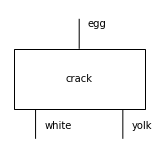

In [4]:
from discopy import Box

crack = Box('crack', dom = egg, cod = white @ yolk)

crack.draw(figsize=(2, 2))

We can create the previous process and its reversible process, besides we can compose them with the ```then``` operator, which is 
```python
>>
```


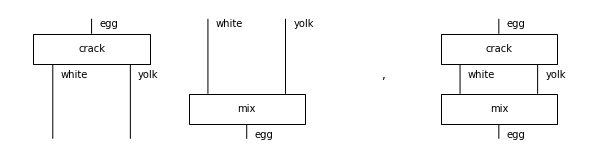

In [5]:
from discopy import drawing

mix = Box('mix', white @ yolk, egg)

crack_tensor_mix = crack @ mix
crack_then_mix = crack >> mix

drawing.equation(crack_tensor_mix, crack_then_mix, space = 1, symbol = ', ', figsize = (8, 2) )

We use the identity such as  
```python
Id
```
for a type, and we can create parallel wires. And we apply the tensor product which does nothing either.

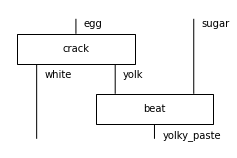

In [6]:
from discopy import Id

assert crack >> Id(white @ yolk) == crack == Id(egg) >> crack
assert crack @ Id(Ty()) == crack == Id(Ty()) @ crack

sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
beat = Box('beat', yolk @ sugar, yolky_paste)

crack_then_beat = crack @ Id(sugar) >> Id(white) @ beat

crack_then_beat.draw(figsize=(3, 2))

We can use ```Swap``` the ingredients.

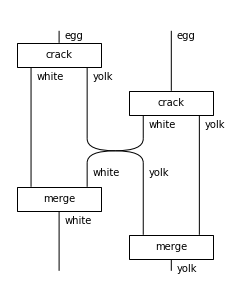

In [7]:
from discopy import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(3, 4))

# Bibliography

[1] [Discopy](https://github.com/oxford-quantum-group/discopy)

[2] [QNLP tutorial](https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html)